# Trabalho da disciplina Projeto/MVP em Ciência de Dados

## Aluno: Luis Eduardo Ribeiro Veiga - RA: 40520223000855

## Notebook modelo Clássico

In [245]:
#-----

## Notebook modelo Deep Learning - Classificador de imagens do dataset CIFAR10

**Descrição do Problema** - Criar um modelo de visão computacional para classificar uma imagem em alguma das categorias presentes no dataset CIPHAR10.

**Dataset** - O dataset CIFAR-10 é composto por 60000 imagens a cores 32x32 em 10 classes, com 6000 imagens por classe. Existem 50000 imagens de treino e 10000 imagens de teste. 

As classes presentes no dataset são: airplane, automobile, bird, cat, deer, dog, frog, horse, ship e truck.

### Importação de bibliotecas

In [218]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
import os
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt

### Funções utilitárias

In [219]:
def prepare_dataset(X_dataset, y_dataset, classes, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    df_aux = pd.DataFrame(columns=['id', 'label'])

    list_aux = []

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        sample = {'id':nm_file, 'label':str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')}
        list_aux.append(sample)

    return pd.concat([df_aux, pd.DataFrame(list_aux)], ignore_index=True)


def create_files(X_dataset, y_dataset, classes, dir, n_samples):
    if n_samples is None:
        img_samples = X_dataset.shape[0]
    else:
        img_samples = n_samples

    for i in range(img_samples):
        nm_file = str(i)+'-'+str([classes[x] for x in y_dataset[i]]).strip('[]').strip('\'')+'.'+'png'
        img = X_dataset[i]
        plt.imsave(dir + nm_file, img)


def create_directory(dir):
    if os.path.exists(dir):
        for file in os.listdir(dir):
            os.remove(dir+file)
    else:
        os.makedirs(dir)


def plot_loss(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss X epoch')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


def plot_accuracy(history):  
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('accuracy X epoch')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


def plot_confusion_matrix(actual, predicted, class_names):
    cnf_matrix = confusion_matrix(actual, predicted, labels=class_names)
    np.set_printoptions(precision=2)

    fig, ax = plt.subplots(figsize=(5, 5))
    cax = ax.matshow(cnf_matrix, cmap=plt.cm.Blues, alpha=0.3, interpolation = 'nearest')
    plt.gca().xaxis.tick_bottom()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    for i in range(cnf_matrix.shape[0]):
        for j in range(cnf_matrix.shape[1]):
            ax.text(x=j, y=i,s=cnf_matrix[i, j], va='center', ha='center')

    fig.colorbar(cax)

    plt.xlabel('Predição', fontsize=13)
    plt.ylabel('Real', fontsize=13)
    plt.title('Matriz de Confusão', fontsize=18)
    plt.show()


def model1(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model1 = models.Sequential()

    model1.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model1.add(layers.MaxPooling2D(pool_size=(2, 2)))

    model1.add(layers.Flatten())
    model1.add(layers.Dense(512, activation='relu'))
    model1.add(layers.Dense(10, activation='softmax'))

    model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model1.fit_generator(generator=p_train_generator,
          validation_data=p_valid_generator,
          steps_per_epoch=p_train_step_size,
          validation_steps=p_validation_step_size,
          epochs=p_epochs)
    
    loss, accuracy = display_result_model (model1, p_test_generator, history)

    # plot_loss(history)
    # plot_accuracy(history)

    # loss, accuracy = model1.evaluate_generator(p_test_generator)
    # print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

    return model1, loss, accuracy


def model2(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model2 = models.Sequential()

    model2.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model2.add(layers.Dropout(0.25))

    model2.add(layers.Flatten())
    model2.add(layers.Dense(512, activation='relu'))
    model2.add(layers.Dropout(0.25))
    model2.add(layers.Dense(10, activation='softmax'))

    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model2.fit_generator(generator=p_train_generator,
          validation_data=p_valid_generator,
          steps_per_epoch=p_train_step_size,
          validation_steps=p_validation_step_size,
          epochs=p_epochs)
    
    loss, accuracy = display_result_model (model2, p_test_generator, history)

    return model2, loss, accuracy


def model3(p_train_generator, p_test_generator, p_valid_generator, p_train_step_size, p_validation_step_size, p_epochs):
    model3 = models.Sequential()

    model3.add(layers.Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu'))

    model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model3.add(layers.Dropout(0.25))

    model3.add(layers.Flatten())
    model3.add(layers.Dense(512, activation='relu'))
    model3.add(layers.BatchNormalization())
    model3.add(layers.Dropout(0.25))
    model3.add(layers.Dense(10, activation='softmax'))

    model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model3.fit_generator(generator=p_train_generator,
          validation_data=p_valid_generator,
          steps_per_epoch=p_train_step_size,
          validation_steps=p_validation_step_size,
          epochs=p_epochs)
    
    loss, accuracy = display_result_model (model3, p_test_generator, history)

    return model3, loss, accuracy


def display_result_model (p_model, p_test_generator, p_history):
    # plot_loss(p_history)
    # plot_accuracy(p_history)

    loss, accuracy = p_model.evaluate_generator(p_test_generator)
    print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

    return loss, accuracy


### Carga e preparação dos dados

In [220]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [221]:
train_dir = "./train/"
test_dir = "./test/" 

create_directory(train_dir)
create_directory(test_dir)

v_train_samples = 2500 #X_train.shape[0]
v_test_samples = 500 #X_test.shape[0]


In [222]:
train_samples = v_train_samples

create_files(X_train, y_train, cifar10_classes, train_dir, train_samples)

train_df = prepare_dataset(X_train, y_train, cifar10_classes, train_samples)

train_df.head()

,id,label
0,0-frog.png,frog
1,1-truck.png,truck
2,2-truck.png,truck
3,3-deer.png,deer
4,4-automobile.png,automobile


In [223]:
test_samples = v_test_samples

create_files(X_test, y_test, cifar10_classes, test_dir, test_samples)

test_df = prepare_dataset(X_test, y_test, cifar10_classes, test_samples)

test_df.head()

,id,label
0,0-cat.png,cat
1,1-ship.png,ship
2,2-ship.png,ship
3,3-airplane.png,airplane
4,4-frog.png,frog


label
deer          262
bird          255
ship          254
horse         253
airplane      253
frog          250
truck         250
cat           244
automobile    243
dog           236
Name: count, dtype: int64


<Axes: title={'center': 'Dados para Treinamento por classe'}, xlabel='label'>

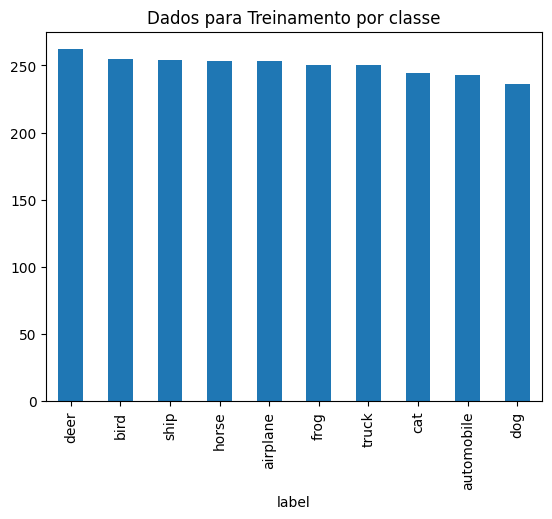

In [224]:
print((train_df['label']).value_counts())
train_df['label'].value_counts().plot.bar(title='Dados para Treinamento por classe')

label
ship          57
airplane      57
truck         56
frog          54
bird          51
cat           49
dog           48
horse         47
automobile    41
deer          40
Name: count, dtype: int64


<Axes: title={'center': 'Dados para Teste por classe'}, xlabel='label'>

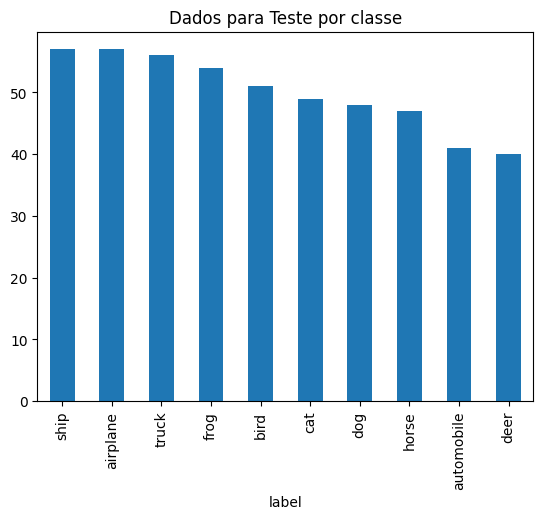

In [225]:
print((test_df['label']).value_counts())
test_df['label'].value_counts().plot.bar(title='Dados para Teste por classe')

In [226]:
print('Total de imagens para treinamento: %s' % len(os.listdir(train_dir)))
print('Total de imagens para teste      : %s' % len(os.listdir(test_dir)))

Total de imagens para treinamento: 2500
Total de imagens para teste      : 500


Classes: ['frog', 'truck', 'truck', 'deer', 'automobile']


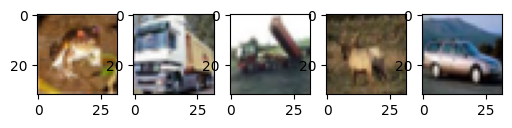

In [227]:
fig, x = plt.subplots(1, 5)
fig.set_size_inches(6, 6)

print('Classes: ' + str([cifar10_classes[x[0]] for x in y_train[0:5]]))

for i in range(5):
    image = X_train[i]
    x[i].imshow(image)

plt.show()

In [228]:
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
                                validation_split=0.25,
                                rotation_range=30,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True                                
                                )

train_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="training",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

valid_generator=train_datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_dir,
x_col="id",
y_col="label",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 1875 validated image filenames belonging to 10 classes.
Found 625 validated image filenames belonging to 10 classes.


In [229]:
test_datagen=ImageDataGenerator(rescale=1.0/255.0)

test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory=test_dir,
x_col="id",
y_col="label",
batch_size=32,
seed=42,
shuffle=False,
class_mode="categorical",
target_size=(32,32))

Found 500 validated image filenames belonging to 10 classes.


### Modelagem e treinamento

In [230]:
train_step_size = train_generator.n//train_generator.batch_size
validation_step_size = valid_generator.n//valid_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

v_epochs = 30

In [231]:
model1, loss1, accuracy1 = model1(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Epoch 1/30
58/58 [==============================] - 6s 85ms/step - loss: 2.2872 - accuracy: 0.1302 - val_loss: 2.2047 - val_accuracy: 0.1891
Epoch 2/30
58/58 [==============================] - 5s 78ms/step - loss: 2.1410 - accuracy: 0.1905 - val_loss: 2.1786 - val_accuracy: 0.1826
Epoch 3/30
58/58 [==============================] - 4s 76ms/step - loss: 2.0567 - accuracy: 0.2165 - val_loss: 1.9609 - val_accuracy: 0.2500
Epoch 4/30
58/58 [==============================] - 5s 79ms/step - loss: 1.9970 - accuracy: 0.2420 - val_loss: 1.9474 - val_accuracy: 0.2697
Epoch 5/30
58/58 [==============================] - 5s 87ms/step - loss: 1.9412 - accuracy: 0.2572 - val_loss: 1.9762 - val_accuracy: 0.2747
Epoch 6/30
58/58 [==============================] - 4s 74ms/step - loss: 1.9072 - accuracy: 0.2849 - val_loss: 1.8277 - val_accuracy: 0.3306
Epoch 7/30
58/58 [==============================] - 5s 89ms/step - loss: 1.8396 - accuracy: 0.3055 - val_loss: 1.8203 - val_accuracy: 0.3224
Epoch 8/30
58

In [232]:
model2, loss2, accuracy2 = model2(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Epoch 1/30
58/58 [==============================] - 6s 84ms/step - loss: 2.2955 - accuracy: 0.1145 - val_loss: 2.2414 - val_accuracy: 0.1743
Epoch 2/30
58/58 [==============================] - 5s 83ms/step - loss: 2.1629 - accuracy: 0.1791 - val_loss: 2.0146 - val_accuracy: 0.2286
Epoch 3/30
58/58 [==============================] - 5s 83ms/step - loss: 2.0456 - accuracy: 0.2241 - val_loss: 2.0396 - val_accuracy: 0.2253
Epoch 4/30
58/58 [==============================] - 5s 83ms/step - loss: 1.9690 - accuracy: 0.2474 - val_loss: 1.9314 - val_accuracy: 0.2533
Epoch 5/30
58/58 [==============================] - 5s 83ms/step - loss: 1.9408 - accuracy: 0.2575 - val_loss: 1.8633 - val_accuracy: 0.3158
Epoch 6/30
58/58 [==============================] - 5s 83ms/step - loss: 1.8723 - accuracy: 0.2773 - val_loss: 1.8663 - val_accuracy: 0.2928
Epoch 7/30
58/58 [==============================] - 5s 83ms/step - loss: 1.8678 - accuracy: 0.2919 - val_loss: 1.7781 - val_accuracy: 0.3125
Epoch 8/30
58

In [233]:
model3, loss3, accuracy3 = model3(train_generator, test_generator, valid_generator, train_step_size, validation_step_size, v_epochs)

Epoch 1/30
58/58 [==============================] - 7s 106ms/step - loss: 2.8190 - accuracy: 0.1970 - val_loss: 3.2067 - val_accuracy: 0.0855
Epoch 2/30
58/58 [==============================] - 7s 113ms/step - loss: 2.3068 - accuracy: 0.2463 - val_loss: 3.3651 - val_accuracy: 0.1069
Epoch 3/30
58/58 [==============================] - 6s 107ms/step - loss: 2.1798 - accuracy: 0.2577 - val_loss: 3.9220 - val_accuracy: 0.1020
Epoch 4/30
58/58 [==============================] - 6s 107ms/step - loss: 2.0481 - accuracy: 0.2908 - val_loss: 3.8458 - val_accuracy: 0.1020
Epoch 5/30
58/58 [==============================] - 6s 110ms/step - loss: 1.9796 - accuracy: 0.3147 - val_loss: 4.0311 - val_accuracy: 0.1053
Epoch 6/30
58/58 [==============================] - 6s 105ms/step - loss: 1.9420 - accuracy: 0.3218 - val_loss: 3.3258 - val_accuracy: 0.1957
Epoch 7/30
58/58 [==============================] - 6s 111ms/step - loss: 1.8838 - accuracy: 0.3440 - val_loss: 2.5167 - val_accuracy: 0.2467
Epoch 

In [234]:
model = model3

if accuracy1 > accuracy3 and accuracy1 > accuracy2:
    model = model1

if accuracy2 > accuracy3 and accuracy2 > accuracy1:
    model = model2

In [236]:
test_generator.reset()
pred=model.predict_generator(test_generator)

In [237]:
loss, accuracy = model.evaluate_generator(test_generator)
print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

Test: accuracy = 0.512000  ;  loss = 1.424535 


In [238]:
predicted_class_indices=np.argmax(pred,axis=1)

In [239]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [240]:
test_generator.reset()

count = 0
actuals = list()

for batch in test_generator:
    count+=1
    if count == len(test_generator)+1:
        break
    else:
        images = batch[0]
        labels = batch[1]
        for i in range(len(images)):
            label = labels[i]
            labeled_class = np.argmax(label)
            label = cifar10_classes[int(labeled_class)]
            actuals.append(label)

accuracy = skm.accuracy_score(actuals, predictions)
precision = skm.precision_score(actuals, predictions, average='weighted')
recall = skm.recall_score(actuals, predictions, average='weighted')
f1score = skm.f1_score(actuals, predictions, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

Accuracy:  0.512
Precision:  0.5303740167533229
Recall:  0.512
F1 Score:  0.5055146716695836


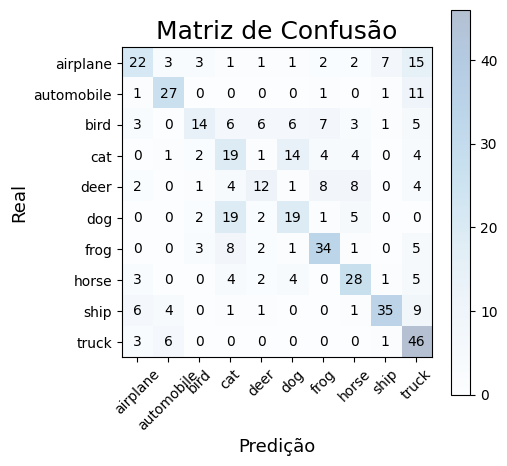

In [241]:
plot_confusion_matrix(actuals, predictions, cifar10_classes)

In [242]:
model_dir = "./trained_models/"
create_directory(model_dir)

# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

model_name = 'trained_model_deep_learning' + formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (model_dir, model_name))
print("Modelo salvo com o nome: ", model_name)

Modelo salvo com o nome:  trained_model_deep_learning2023-07-10T0222.h5


In [243]:
model_loaded = keras.models.load_model("%s/%s" % (model_dir, model_name))
print("Modelo %s carregado com sucesso" % (model_name))

Modelo trained_model_deep_learning2023-07-10T0222.h5 carregado com sucesso


1/1 [==============================] - 0s 74ms/step


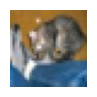

Label:  cat
Previsão:  cat
Probabilidade:  0.6783806


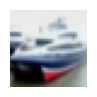

Label:  ship
Previsão:  ship
Probabilidade:  0.49774683


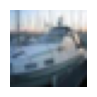

Label:  ship
Previsão:  ship
Probabilidade:  0.6962691


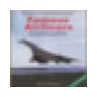

Label:  airplane
Previsão:  airplane
Probabilidade:  0.4442917


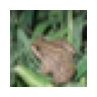

Label:  frog
Previsão:  deer
Probabilidade:  0.4626917


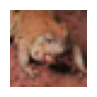

Label:  frog
Previsão:  frog
Probabilidade:  0.66376394


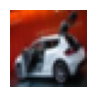

Label:  automobile
Previsão:  automobile
Probabilidade:  0.675936


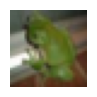

Label:  frog
Previsão:  frog
Probabilidade:  0.80273545


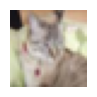

Label:  cat
Previsão:  cat
Probabilidade:  0.48833996


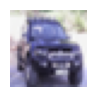

Label:  automobile
Previsão:  automobile
Probabilidade:  0.7374867


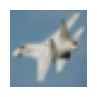

Label:  airplane
Previsão:  airplane
Probabilidade:  0.32998645


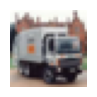

Label:  truck
Previsão:  truck
Probabilidade:  0.92948234


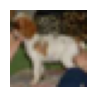

Label:  dog
Previsão:  cat
Probabilidade:  0.5524664


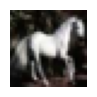

Label:  horse
Previsão:  horse
Probabilidade:  0.9700748


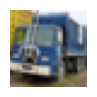

Label:  truck
Previsão:  truck
Probabilidade:  0.6883341


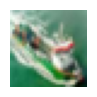

Label:  ship
Previsão:  airplane
Probabilidade:  0.3104824


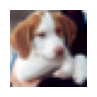

Label:  dog
Previsão:  dog
Probabilidade:  0.6948557


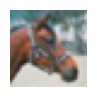

Label:  horse
Previsão:  horse
Probabilidade:  0.3454478


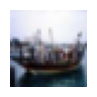

Label:  ship
Previsão:  truck
Probabilidade:  0.5376989


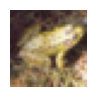

Label:  frog
Previsão:  frog
Probabilidade:  0.54140705


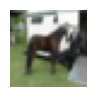

Label:  horse
Previsão:  truck
Probabilidade:  0.5039622


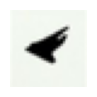

Label:  airplane
Previsão:  airplane
Probabilidade:  0.653357


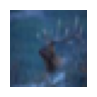

Label:  deer
Previsão:  airplane
Probabilidade:  0.29007557


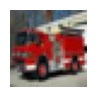

Label:  truck
Previsão:  truck
Probabilidade:  0.83959955


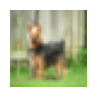

Label:  dog
Previsão:  bird
Probabilidade:  0.24871276


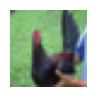

Label:  bird
Previsão:  truck
Probabilidade:  0.4739874


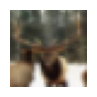

Label:  deer
Previsão:  deer
Probabilidade:  0.47593734


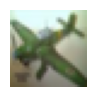

Label:  airplane
Previsão:  horse
Probabilidade:  0.35632908


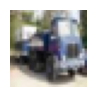

Label:  truck
Previsão:  truck
Probabilidade:  0.60559076


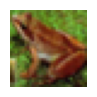

Label:  frog
Previsão:  frog
Probabilidade:  0.6682162


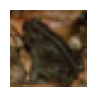

Label:  frog
Previsão:  cat
Probabilidade:  0.41601726


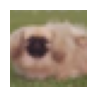

Label:  dog
Previsão:  deer
Probabilidade:  0.35483247
1/1 [==============================] - 0s 26ms/step


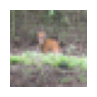

Label:  deer
Previsão:  deer
Probabilidade:  0.26937404


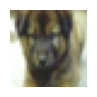

Label:  dog
Previsão:  cat
Probabilidade:  0.37979344


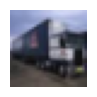

Label:  truck
Previsão:  truck
Probabilidade:  0.9238933


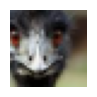

Label:  bird
Previsão:  truck
Probabilidade:  0.4639952


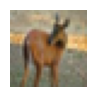

Label:  deer
Previsão:  horse
Probabilidade:  0.4939253


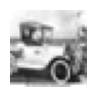

Label:  automobile
Previsão:  automobile
Probabilidade:  0.5974912


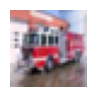

Label:  truck
Previsão:  truck
Probabilidade:  0.7866823


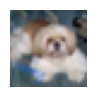

Label:  dog
Previsão:  cat
Probabilidade:  0.39050117


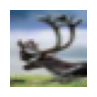

Label:  deer
Previsão:  truck
Probabilidade:  0.6597385


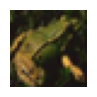

Label:  frog
Previsão:  frog
Probabilidade:  0.8095809


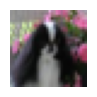

Label:  dog
Previsão:  cat
Probabilidade:  0.5557485


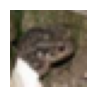

Label:  frog
Previsão:  frog
Probabilidade:  0.61952007


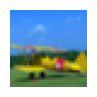

Label:  airplane
Previsão:  airplane
Probabilidade:  0.8019846


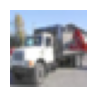

Label:  truck
Previsão:  truck
Probabilidade:  0.94076806


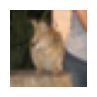

Label:  cat
Previsão:  cat
Probabilidade:  0.5956848


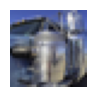

Label:  truck
Previsão:  truck
Probabilidade:  0.59648764


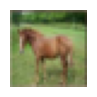

Label:  horse
Previsão:  deer
Probabilidade:  0.7125672


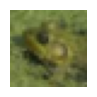

Label:  frog
Previsão:  bird
Probabilidade:  0.32908493


In [244]:
test_generator.reset()

count = 0
y_pred = list()
y_true = list()
#class_names = cifar10_classes

img_count = 0
max_img = 50

# Loop do data generator de teste que contem as imagens
for batch in test_generator:
    count+=1

    # Condição de saída do loop. Só executaremos o modelo em algumas imagens
    if count == len(test_generator)+1 or img_count > max_img:
        break

    else:
        # Pegando a imagem e o label
        images = batch[0]
        labels = batch[1]

        # Previsão
        predictions = model_loaded.predict(images)

        # Visualização da imagem
        for i in range(len(images)):
            img_count+=1

            if img_count > max_img:
                break
            else:

                image = images[i]
                label = labels[i]

                prediction = predictions[i]

                # Converte o array de previsão para visualizar a classe e a probabilidade
                predicted_class = np.argmax(prediction)
                probability = prediction[predicted_class]

                labeled_class = np.argmax(label)
                label = cifar10_classes[int(labeled_class)]

                y_true.append(label)

                # Faz o DE-PARA da probabilidade com o tipo de classe da previsão
                # class_name = 'dog' if prediction >= 0.5 else 'cat'

                class_name = cifar10_classes[int(predicted_class)]

                y_pred.append(class_name)

                # Configura a saída das imagens que serão visualizadas
                
                fig, x = plt.subplots(1, 1)
                fig.set_size_inches(1, 1)

                plt.imshow(images[i])
                plt.axis('Off')
                plt.show()
                
                # Imprime os resultados da classificação das images
                print("Label: ", label)
                print("Previsão: ", class_name) 
                print("Probabilidade: ", probability) 